# Group 2 - Data Mining Project on NYC 311 Service Request
### Tags - Data Manipulation, Data Visualization, Data Modelling, Machine Learning
### Group Members:
                        1. Trupal Chaudhary
                        2. Umang Patel
                        3. Dhartiben Kantibhai
                        4. Jay Babulal
                        5. Khushi
                        6. Sushank Saini

### NYC deals with a substantial volume of 311 service requests covering numerous categories of non-emergency issues, which encompass concerns like noise complaints, plumbing problems, and incidents of unauthorized parking. These requests are initially received by NYC311 and subsequently directed to the pertinent government agencies, which could include departments such as the police, buildings, or transportation.

## AIM :

### Conduct an analysis of service request data for New York City 311 calls. Emphasize the utilization of data wrangling techniques to uncover data patterns and create visualizations that highlight the primary types of complaints.





In [135]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.stats import f_oneway
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ensure that plots are displayed inline
%matplotlib inline


In [2]:
# Load the CSV file into a DataFrame, parsing date columns
df311 = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", parse_dates=["Created Date", "Closed Date"])

# Replace 'Unspecified' values with NaN in the DataFrame
df311.replace('Unspecified', np.NaN, inplace=True)

/var/folders/rd/fmrbgfm11rqgnrk55gfcg8200000gn/T/ipykernel_16693/1659000586.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df311 = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv",parse_dates=["Created Date", "Closed Date"])


In [136]:
# Print summary information about the DataFrame
df311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 57 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      364558 non-null  int64          
 1   Created Date                    364558 non-null  datetime64[ns] 
 2   Closed Date                     362177 non-null  datetime64[ns] 
 3   Agency                          364558 non-null  object         
 4   Agency Name                     364558 non-null  object         
 5   Complaint Type                  364558 non-null  object         
 6   Descriptor                      358057 non-null  object         
 7   Location Type                   364425 non-null  object         
 8   Incident Zip                    361560 non-null  float64        
 9   Incident Address                312859 non-null  object         
 10  Street Name                     312859 non-n

In [272]:
# Display unique values in the 'Complaint Type' column
print(df311['Complaint Type'].unique())

['Noise - Street/Sidewalk' 'Blocked Driveway' 'Illegal Parking'
 'Derelict Vehicle' 'Noise - Commercial' 'Noise - House of Worship'
 'Posting Advertisement' 'Noise - Vehicle' 'Animal Abuse' 'Vending'
 'Traffic' 'Drinking' 'Bike/Roller/Skate Chronic' 'Panhandling'
 'Noise - Park' 'Homeless Encampment' 'Urinating in Public' 'Graffiti'
 'Disorderly Youth' 'Illegal Fireworks' 'Ferry Complaint' 'Agency Issues'
 'Squeegee' 'Animal in a Park']


In [273]:
# Display unique values in the 'Descriptor' column
print(df311['Descriptor'].unique())

['Loud Music/Party' 'No Access' 'Commercial Overnight Parking'
 'Blocked Sidewalk' 'Posted Parking Sign Violation' 'Blocked Hydrant'
 'With License Plate' 'Partial Access' 'Unauthorized Bus Layover'
 'Double Parked Blocking Vehicle' 'Double Parked Blocking Traffic'
 'Vehicle' 'Loud Talking' 'Banging/Pounding' 'Car/Truck Music' 'Tortured'
 'In Prohibited Area' 'Congestion/Gridlock' 'Neglected' 'Car/Truck Horn'
 'In Public' 'Other (complaint details)' nan 'No Shelter'
 'Truck Route Violation' 'Unlicensed' 'Overnight Commercial Storage'
 'Engine Idling' 'After Hours - Licensed Est' 'Detached Trailer'
 'Underage - Licensed Est' 'Chronic Stoplight Violation' 'Loud Television'
 'Chained' 'Building' 'In Car' 'Police Report Requested'
 'Chronic Speeding' 'Playing in Unsuitable Place' 'Drag Racing'
 'Police Report Not Requested' 'Nuisance/Truant' 'Homeless Issue'
 'Language Access Complaint' 'Disruptive Passenger' 'Animal Waste']


In [139]:
# Display unique values in the 'City' column
print(df311['City'].unique())

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', nan, 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [141]:
# Count the number of non-null values in each column of the DataFrame
df311.count()

Unique Key                        364558
Created Date                      364558
Closed Date                       362177
Agency                            364558
Agency Name                       364558
Complaint Type                    364558
Descriptor                        358057
Location Type                     364425
Incident Zip                      361560
Incident Address                  312859
Street Name                       312859
Cross Street 1                    307370
Cross Street 2                    306753
Intersection Street 1              51120
Intersection Street 2              50512
Address Type                      361306
City                              361561
Landmark                             375
Facility Type                     362169
Status                            364558
Due Date                          364555
Resolution Description            364558
Resolution Action Updated Date    362156
Community Board                   364558
Borough         

In [142]:
# Count the number of unique values in each column of the DataFrame
df311.nunique()

Unique Key                        364558
Created Date                      362018
Closed Date                       339837
Agency                                 1
Agency Name                            3
Complaint Type                        24
Descriptor                            45
Location Type                         18
Incident Zip                         201
Incident Address                  126372
Street Name                         7693
Cross Street 1                      6234
Cross Street 2                      6064
Intersection Street 1               4704
Intersection Street 2               4422
Address Type                           5
City                                  48
Landmark                             120
Facility Type                          1
Status                                 4
Due Date                          362015
Resolution Description                18
Resolution Action Updated Date    340833
Community Board                       75
Borough         

In [144]:
# Grouping by 'Complaint Type' and 'City', and getting the size/count of each group
complaintTypecity = pd.DataFrame({'count':
                                  df311.groupby(['Complaint Type','City']).size()}).reset_index()
complaintTypecity

,Complaint Type,City,count
0,Animal Abuse,Arverne,46
1,Animal Abuse,Astoria,170
2,Animal Abuse,Bayside,53
3,Animal Abuse,Bellerose,15
4,Animal Abuse,Breezy Point,2
...,...,...,...
754,Vending,Staten Island,25
755,Vending,Sunnyside,15
756,Vending,Whitestone,1
757,Vending,Woodhaven,6


In [145]:
# Grouping by 'Borough', 'Complaint Type', and 'Descriptor', and getting the size/count of each group
df311.groupby(['Borough','Complaint Type','Descriptor']).size()

Borough      Complaint Type         Descriptor               
BRONX        Animal Abuse           Chained                      166
                                    In Car                        41
                                    Neglected                    951
                                    No Shelter                   165
                                    Other (complaint details)    412
                                                                ... 
Unspecified  Noise - Vehicle        Engine Idling                 13
             Posting Advertisement  Vehicle                        1
             Traffic                Truck Route Violation          1
             Vending                In Prohibited Area             2
                                    Unlicensed                     5
Length: 290, dtype: int64

In [146]:
# Calculate the time taken to close each request by subtracting 'Created Date' from 'Closed Date'
df311["Request_Closing_Time"] = df311["Closed Date"] - df311["Created Date"]

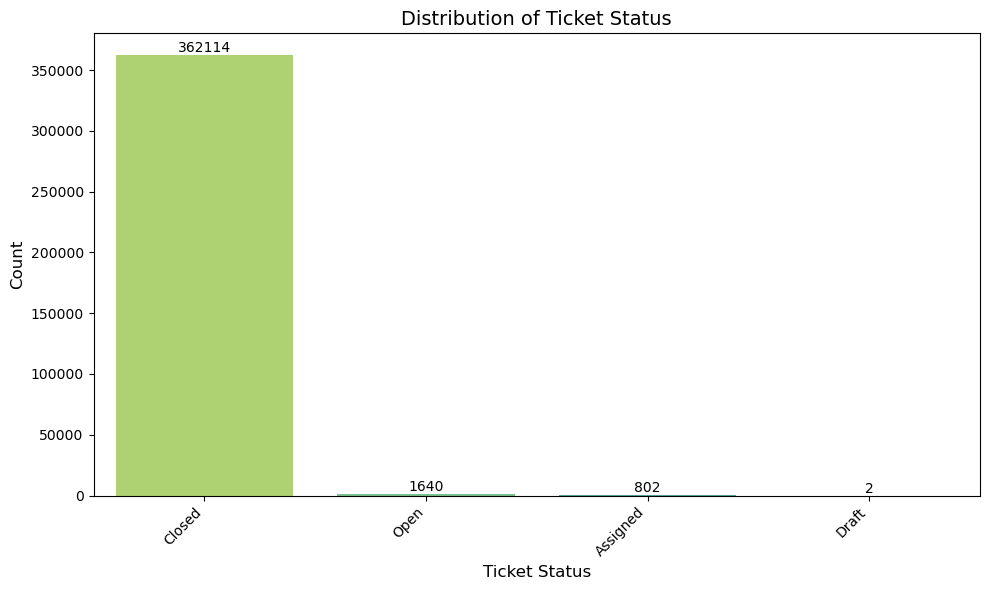

In [159]:
# Set the color palette using Seaborn
sns.set_palette("viridis_r")

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Create a countplot to show the distribution of ticket status
sns.countplot(data=df311, x='Status', alpha=0.8)

# Add labels to the plot
plt.xlabel('Ticket Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Ticket Status', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adding data labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

# Display the plot
plt.show()


In [160]:
print('Start from : ',min(df311['Created Date']))
print('Till : ',max(df311['Created Date']))

Start from :  2015-01-01 00:00:50
Till :  2015-12-31 23:59:45


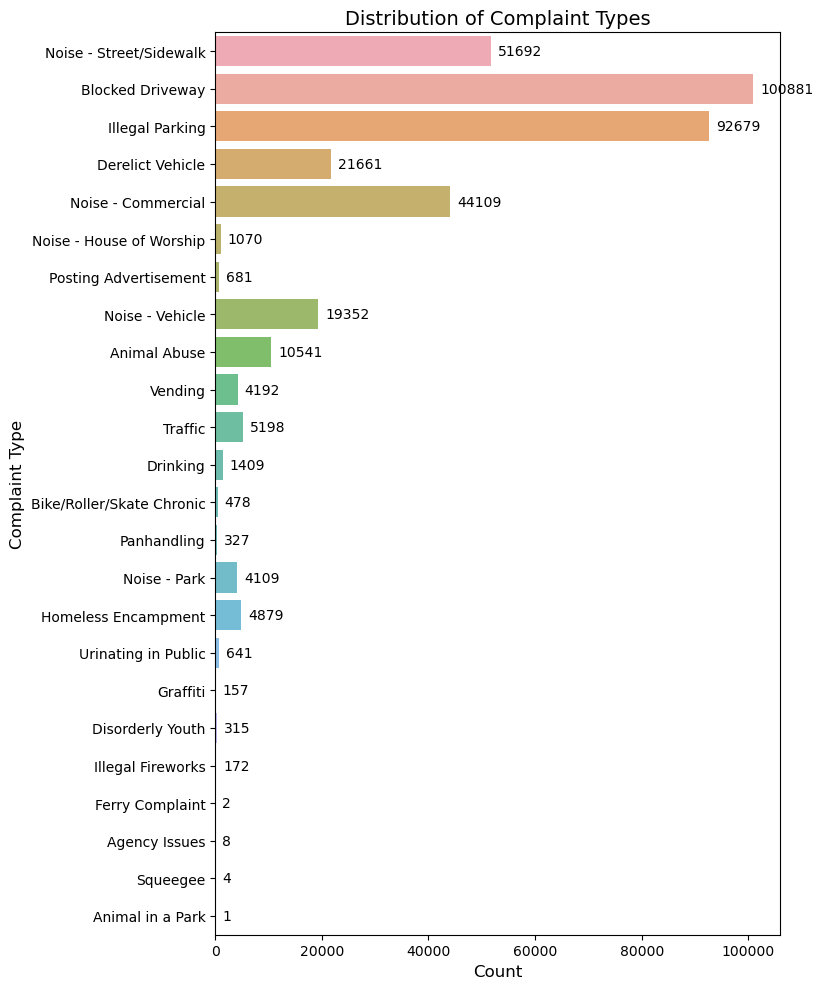

In [170]:
# Have a look at the complaint types
plt.figure(figsize=(8, 10))
ax = sns.countplot(data=df311, y='Complaint Type', alpha=0.8)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Complaint Type', fontsize=12)
plt.title('Distribution of Complaint Types', fontsize=14)
plt.tight_layout()

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

plt.show()


In [171]:
df311.groupby(["Borough","Complaint Type","Descriptor"]).size()

Borough      Complaint Type         Descriptor               
BRONX        Animal Abuse           Chained                      166
                                    In Car                        41
                                    Neglected                    951
                                    No Shelter                   165
                                    Other (complaint details)    412
                                                                ... 
Unspecified  Noise - Vehicle        Engine Idling                 13
             Posting Advertisement  Vehicle                        1
             Traffic                Truck Route Violation          1
             Vending                In Prohibited Area             2
                                    Unlicensed                     5
Length: 290, dtype: int64

In [172]:
# Drop rows with missing values in the "Complaint Type" column
majorcomplaints=df311.dropna(subset=["Complaint Type"])
# Group the data by "Complaint Type"
majorcomplaints=df311.groupby("Complaint Type")

# Count the occurrences of each "Complaint Type" and sort them in descending order
sortedComplaintType = majorcomplaints.size().sort_values(ascending = False)
# Convert the sorted series to a DataFrame and reset the index
sortedComplaintType = sortedComplaintType.to_frame('count').reset_index()

sortedComplaintType
sortedComplaintType.head(10)

,Complaint Type,count
0,Blocked Driveway,100881
1,Illegal Parking,92679
2,Noise - Street/Sidewalk,51692
3,Noise - Commercial,44109
4,Derelict Vehicle,21661
5,Noise - Vehicle,19352
6,Animal Abuse,10541
7,Traffic,5198
8,Homeless Encampment,4879
9,Vending,4192


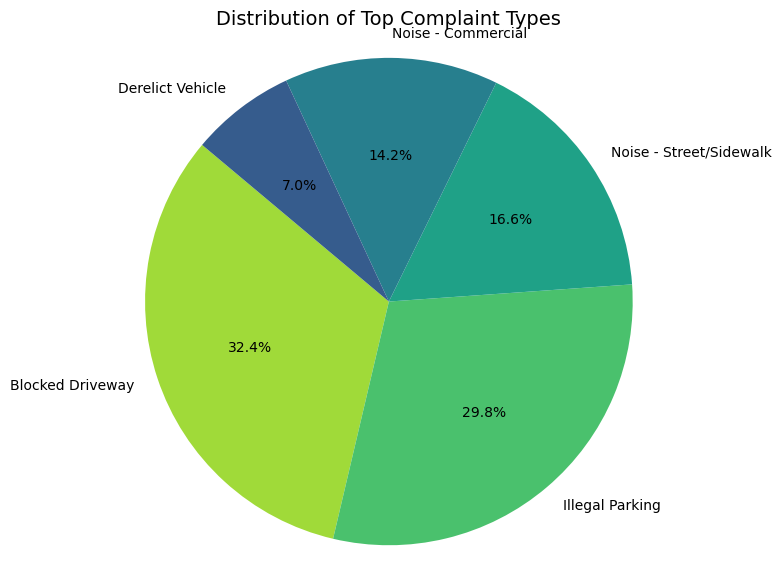

In [177]:
# Sorting the complaint types
sortedComplaintType = sortedComplaintType.head()

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(sortedComplaintType['count'], labels=sortedComplaintType["Complaint Type"], autopct="%1.1f%%",
        startangle=140, colors=sns.color_palette("viridis_r"))
plt.title('Distribution of Top Complaint Types', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
plt.show()

In [182]:
groupedby_complainttype = df311.groupby('Complaint Type')

# Get the group data for 'Blocked Driveway'
grp_data = groupedby_complainttype.get_group('Blocked Driveway')

# Check the shape of the group data
print(grp_data.shape)


(100881, 57)


In [183]:
df311['City'].dropna(inplace=True)

In [184]:
grp_data['City'].fillna('Unknown City', inplace =True)

/var/folders/rd/fmrbgfm11rqgnrk55gfcg8200000gn/T/ipykernel_16693/2632119354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grp_data['City'].fillna('Unknown City', inplace =True)


In [185]:
grp_data['City'].isnull().sum()

0

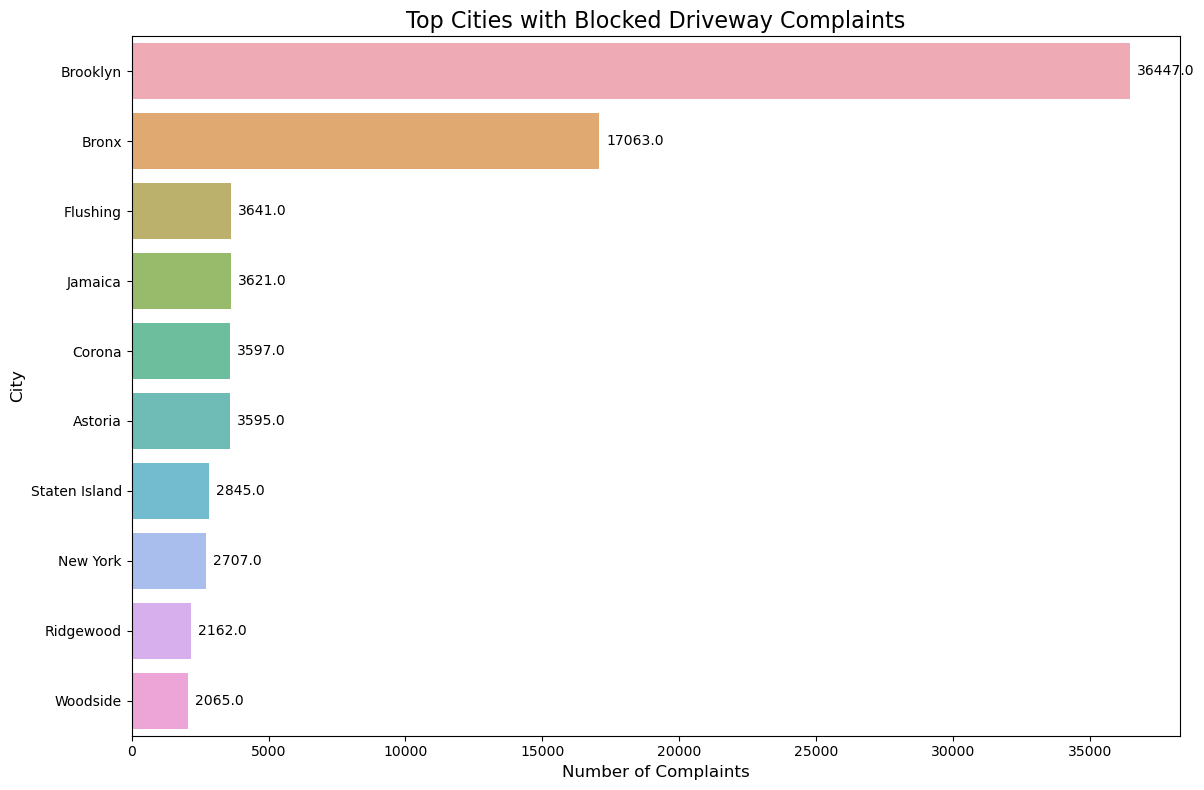

In [194]:
sns.set_palette("viridis")

plt.figure(figsize=(12, 8))
city_counts = grp_data['City'].value_counts().sort_values(ascending=False).head(10)

ax = sns.barplot(x=city_counts.values, y=city_counts.index, alpha=0.8)
plt.title('Top Cities with Blocked Driveway Complaints', fontsize=16)
plt.xlabel('Number of Complaints', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

plt.show()

In [199]:
# List of top complaint types to focus on
top_complaints = ['Blocked Driveway', 'Illegal Parking', 'Noise - Commercial', 
                  'Noise - Street/Sidewalk', 'Derelict Vehicle', 'Animal Abuse', 
                  'Traffic', 'Homeless Encampment', 'Noise - Park']

# Grouping the data by 'Borough' and 'Complaint Type', and creating a pivot table
borough_complaint_pivot = df311.groupby(['Borough', 'Complaint Type']).size().unstack()

# Selecting only the columns for the top complaint types
borough_complaint_pivot_filtered = borough_complaint_pivot[top_complaints]
borough_complaint_pivot_filtered

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Commercial,Noise - Street/Sidewalk,Derelict Vehicle,Animal Abuse,Traffic,Homeless Encampment,Noise - Park
Borough,,,,,,,,,
BRONX,17063.0,9888.0,2945.0,9144.0,2403.0,1971.0,429.0,274.0,548.0
BROOKLYN,36447.0,33533.0,13860.0,13983.0,6260.0,3191.0,1260.0,948.0,1575.0
MANHATTAN,2708.0,14561.0,18702.0,22380.0,694.0,1941.0,1771.0,3063.0,1244.0
QUEENS,41486.0,27209.0,7406.0,4681.0,9919.0,2640.0,1510.0,517.0,649.0
STATEN ISLAND,2845.0,6223.0,785.0,889.0,2184.0,786.0,227.0,77.0,67.0
Unspecified,332.0,1265.0,411.0,615.0,201.0,12.0,1.0,NaN,26.0


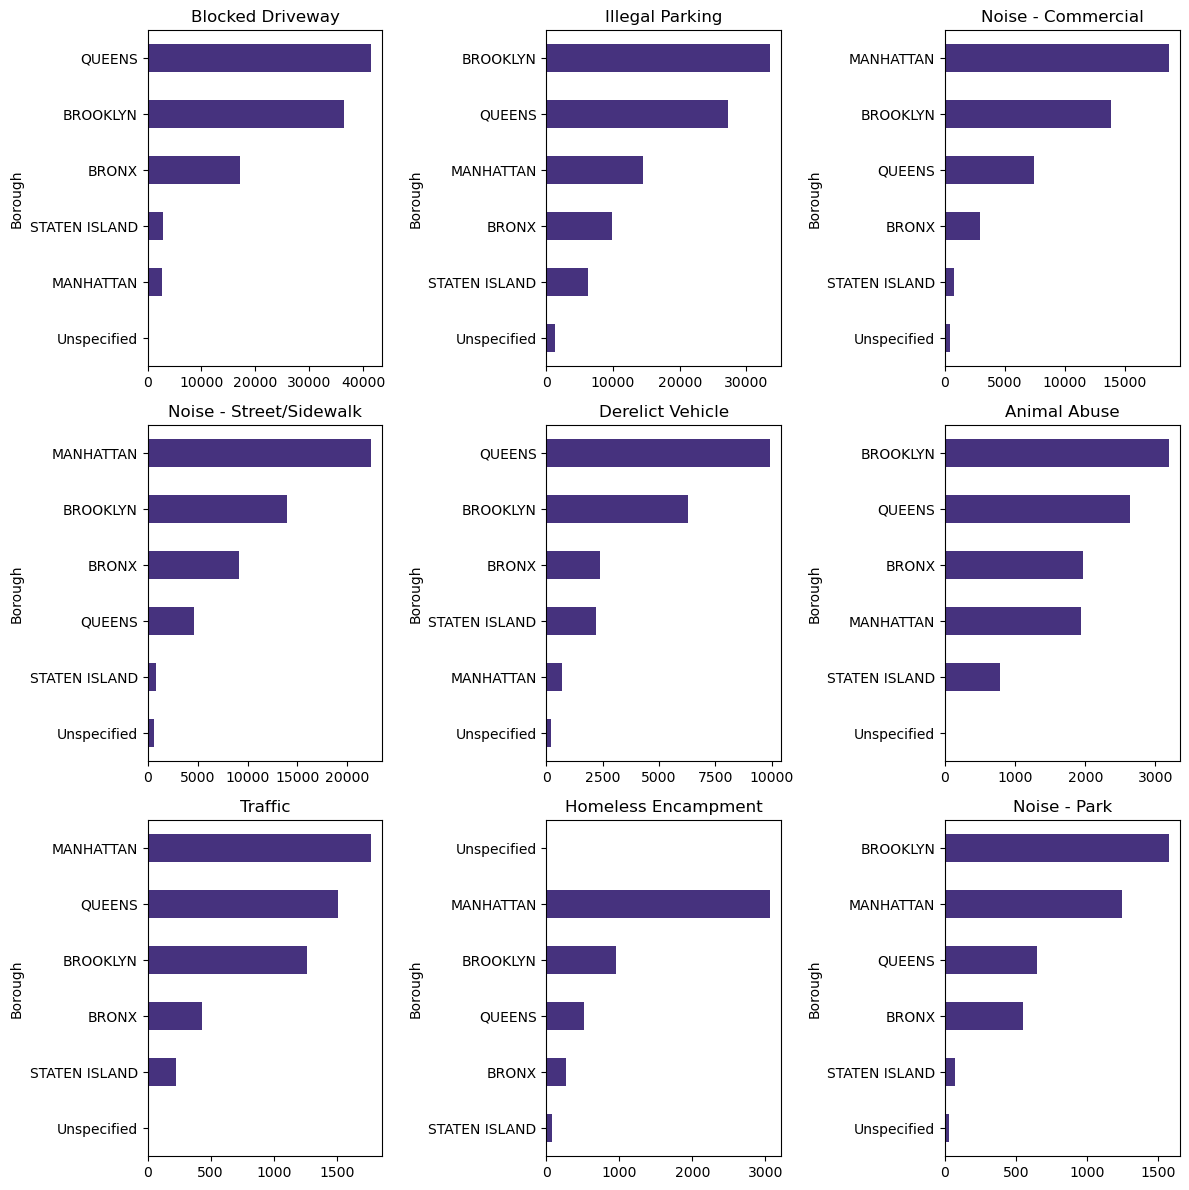

In [204]:
# Grouping the data by 'City' and 'Complaint Type', and getting the size/count of each group
city_comp = df311.groupby(['City','Complaint Type']).size().unstack()

# Define the number of columns and rows for the subplots
col_number = 3
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

# Iterate over the data to create subplots
for d, (label,col) in enumerate(comp_borough.iteritems()):
    ax = axes[int(d/col_number), d%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

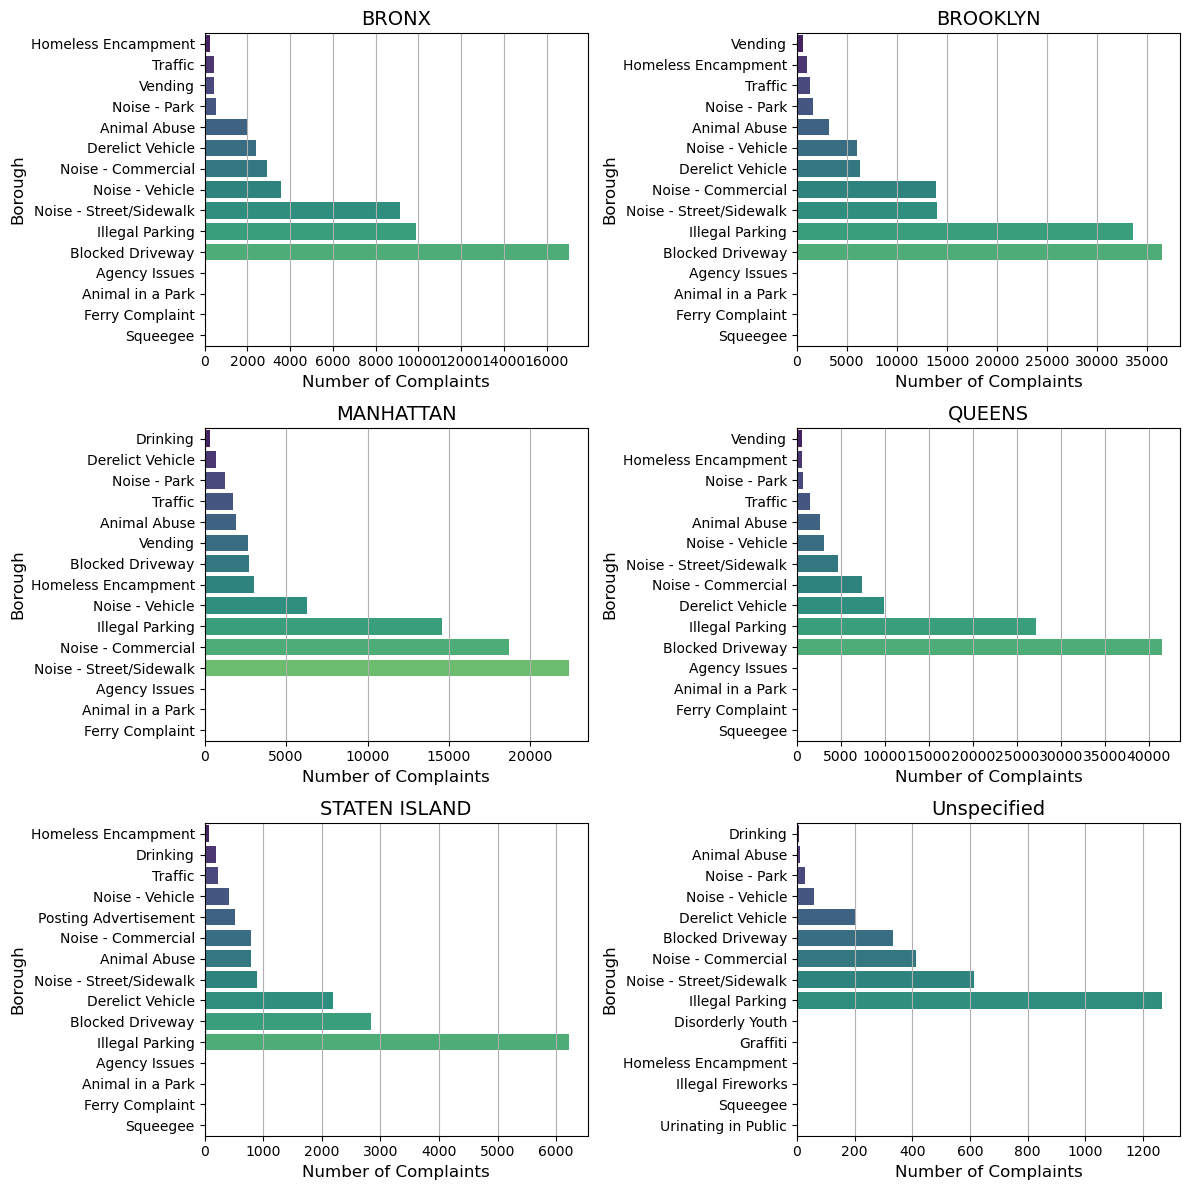

In [205]:
# Grouping the data by 'Complaint Type' and 'Borough', and creating a pivot table
borough_comp = df311.groupby(['Complaint Type', 'Borough']).size().unstack()

# Define the number of columns and rows in the grid
col_number = 2
row_number = 3

# Create a grid of subplots
fig, axes = plt.subplots(row_number, col_number, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the complaint types and plot in each subplot
for i, (label, col) in enumerate(borough_comp.iteritems()):
    ax = axes[i]
    col = col.sort_values(ascending=True).tail(15)  # Choose the top 15 boroughs
    sns.barplot(x=col.values, y=col.index, ax=ax, palette='viridis')
    ax.set_title(label, fontsize=14)
    ax.set_xlabel('Number of Complaints', fontsize=12)
    ax.set_ylabel('Borough', fontsize=12)
    ax.xaxis.grid(True)
    ax.yaxis.grid(False)

plt.tight_layout()
plt.show()

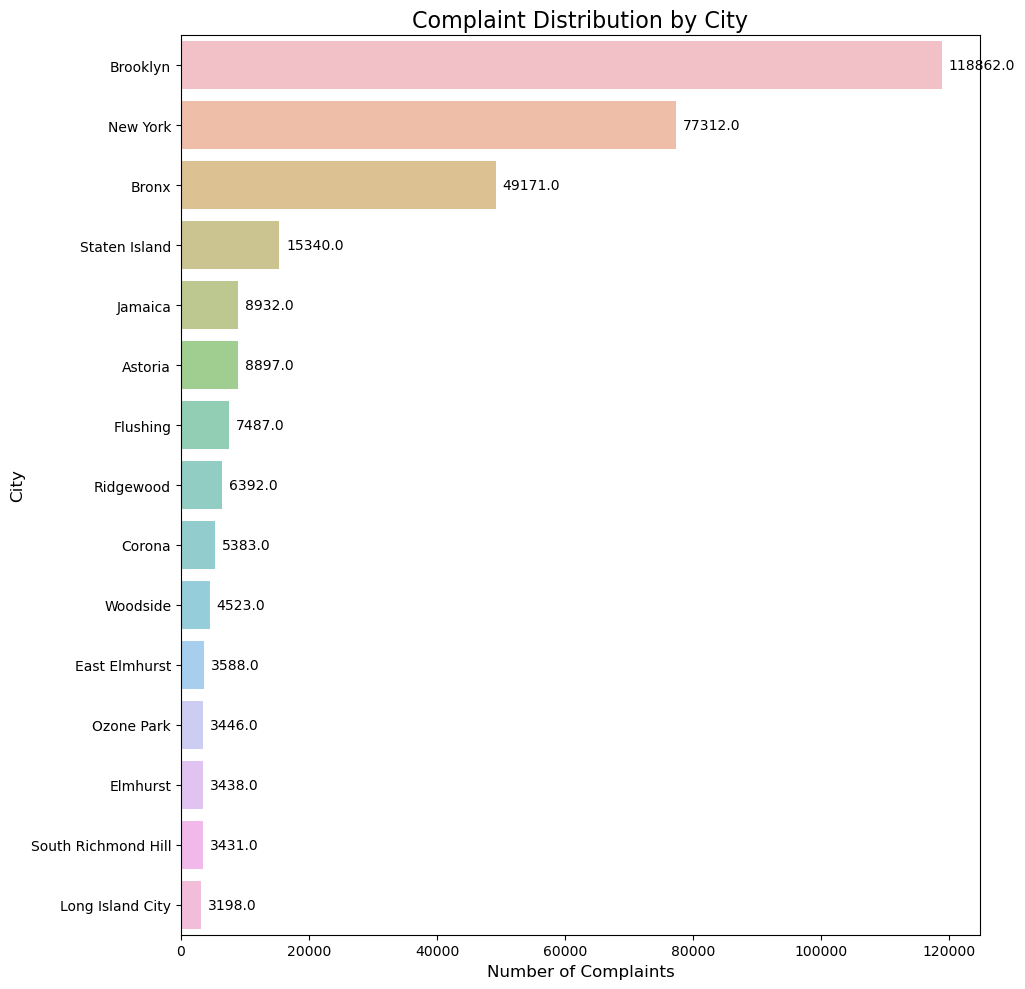

In [208]:
# Create a bar plot of complaint distribution by city
plt.figure(figsize=(10, 10))
city_counts = df311['City'].value_counts().sort_values(ascending=False)[:15]  # Choose the top 15 cities
ax = sns.barplot(x=city_counts.values, y=city_counts.index, alpha=0.6)
plt.title('Complaint Distribution by City', fontsize=16)
plt.xlabel('Number of Complaints', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

plt.show()

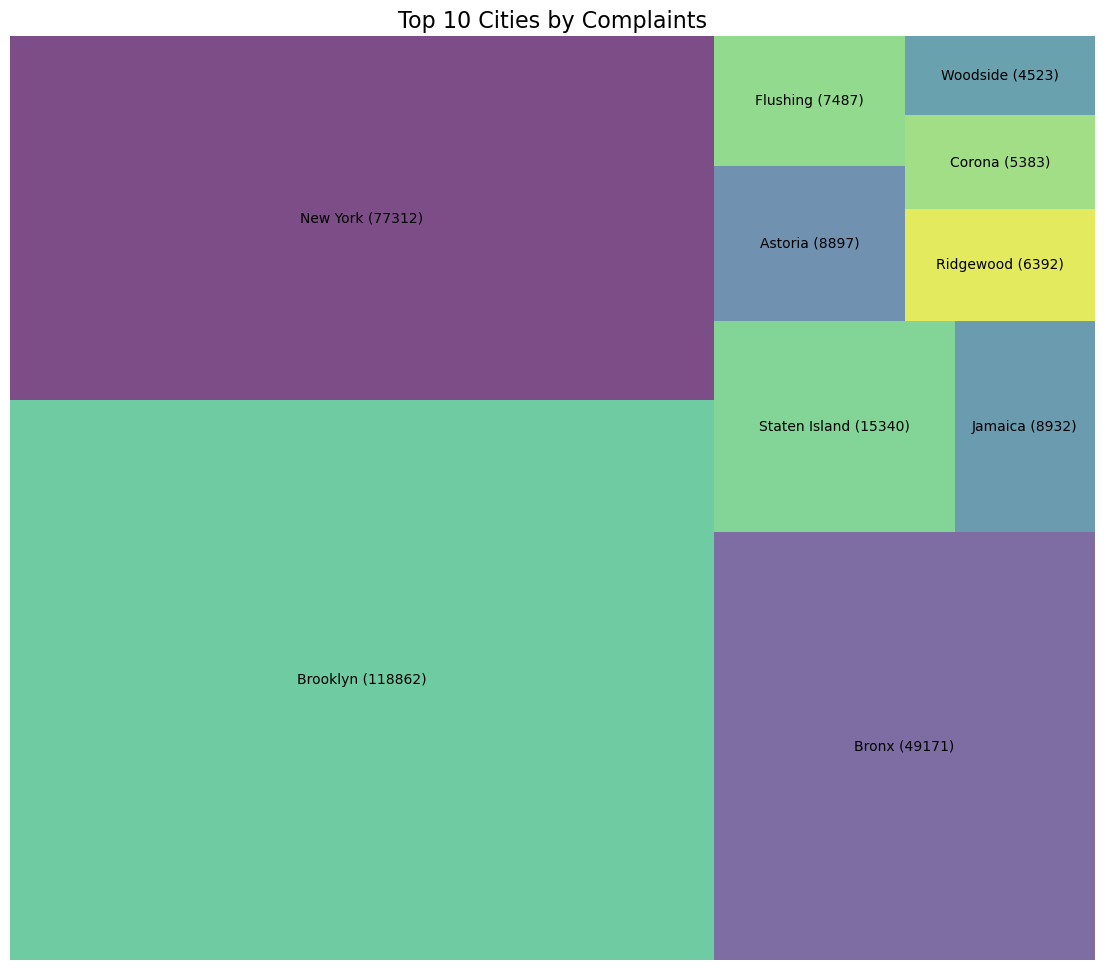

In [209]:
# Create a DataFrame of the top 10 cities and their complaint counts
citywise_complaints = pd.DataFrame(df311['City'].value_counts()[:10])

# Set up the figure size
fig = plt.gcf()
fig.set_size_inches(14, 12)

# Combine city names and complaint counts for labeling
labels = [f'{city} ({count})' for city, count in zip(citywise_complaints.index, citywise_complaints['City'])]

# Create a treemap using squarify
squarify.plot(sizes=citywise_complaints['City'], label=labels, alpha=0.7)
plt.axis('off')
plt.title('Top 10 Cities by Complaints', fontsize=16)

plt.show()

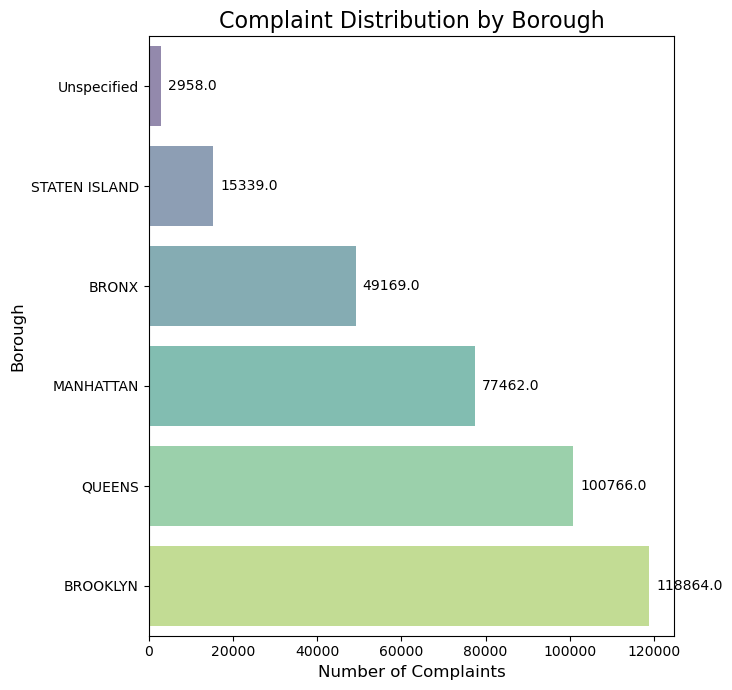

In [212]:
# Create a horizontal bar plot of complaint distribution by borough
plt.figure(figsize=(7, 7))
borough_counts = df311['Borough'].value_counts().sort_values(ascending=True)
ax = sns.barplot(x=borough_counts.values, y=borough_counts.index, alpha=0.6)
plt.title('Complaint Distribution by Borough', fontsize=16)
plt.xlabel('Number of Complaints', fontsize=12)
plt.ylabel('Borough', fontsize=12)
plt.tight_layout()

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

plt.show()

In [213]:
df311['Request_Closing_Time'] = df311['Closed Date'] - df311['Created Date']

In [214]:
df311['Request_Closing_Hours'] = df311['Request_Closing_Time'].astype('timedelta64[h]')+1
df311[['Request_Closing_Time','Request_Closing_Hours']].head()

,Request_Closing_Time,Request_Closing_Hours
0,0 days 00:55:30,1.0
1,0 days 01:27:13,2.0
2,0 days 04:51:34,5.0
3,0 days 07:45:27,8.0
4,0 days 03:27:44,4.0


In [218]:
mean = df311['Request_Closing_Hours'].mean()
std = df311['Request_Closing_Hours'].std()

print('Mean : ',mean)
print('STD : ',std)

Mean :  4.704821123373378
STD :  5.8638184209082835


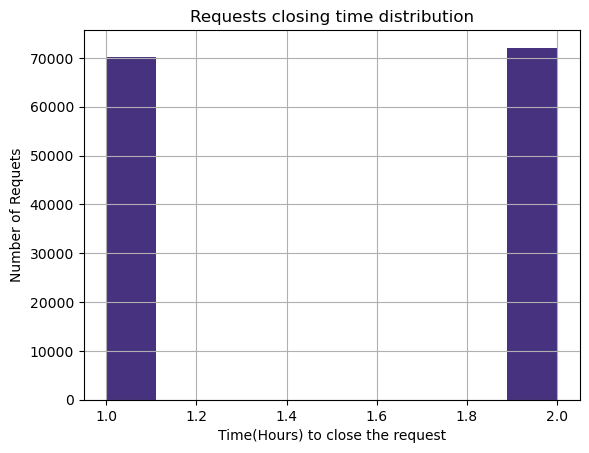

In [240]:
# Filter data where z-score is less than 1
plot_data = df311[ ((df311['Request_Closing_Hours']-mean)/std) < 1]
# Create a histogram of the filtered data
plot_data['Request_Closing_Hours'].hist(bins=9)
plt.xlabel('Time(Hours) to close the request')
plt.ylabel('Number of Requets')
plt.title('Requests closing time distribution')
plt.show()


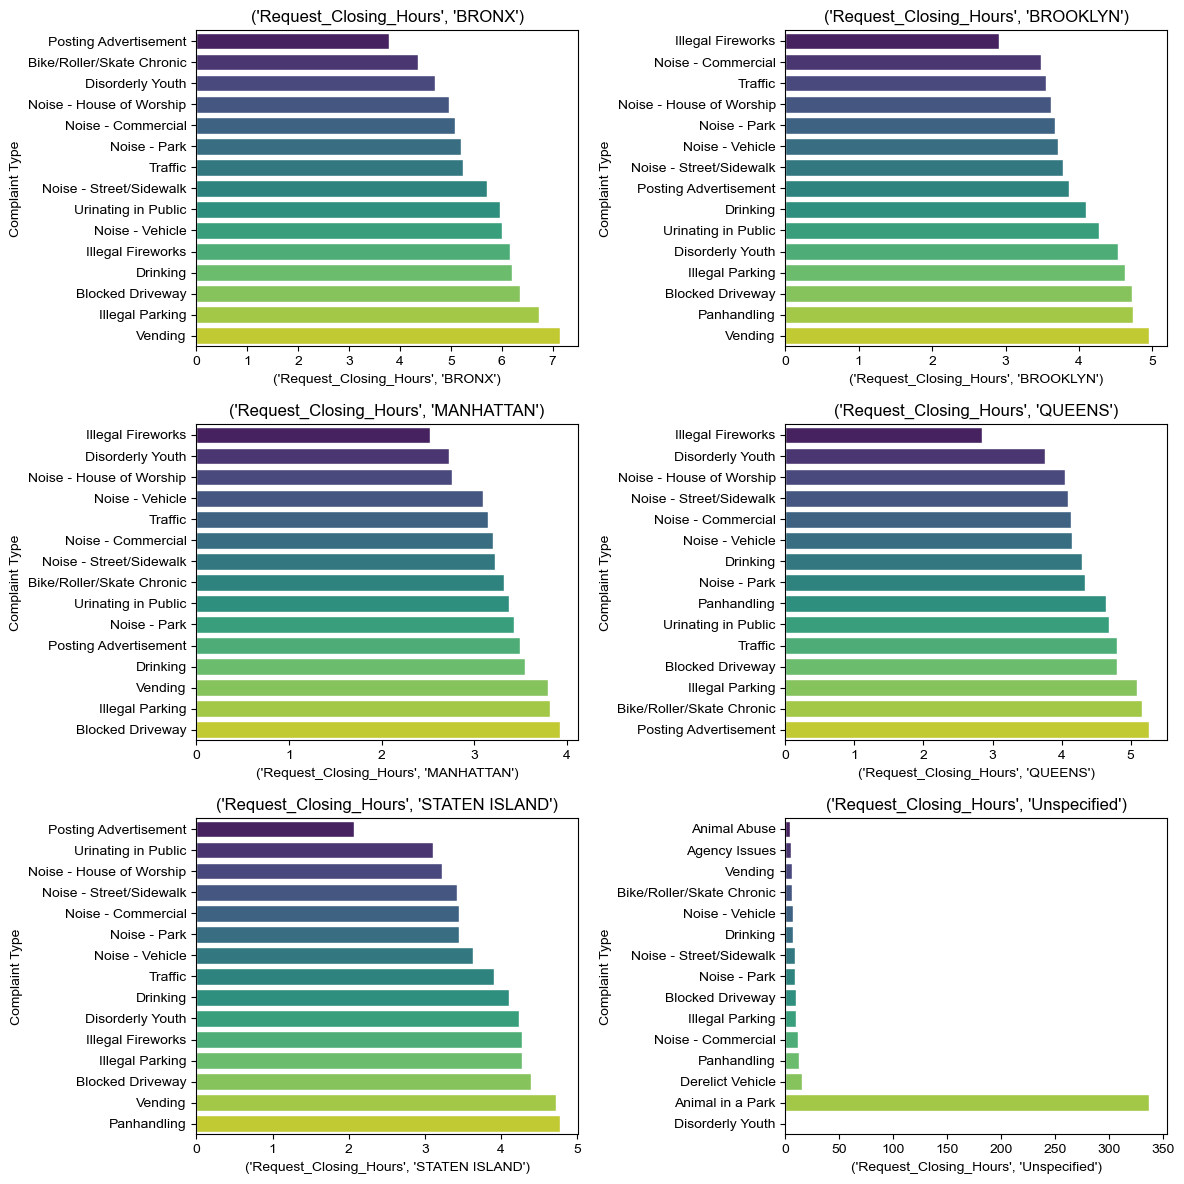

In [241]:
# Grouping by 'Complaint Type' and 'Borough', and calculating the mean 'Request_Closing_Hours'
citywise_resolution = df311.groupby(['Complaint Type', 'Borough'])[['Request_Closing_Hours']].mean().unstack()

# Define the number of columns and rows for the subplots
col_number = 2
row_number = 3

# Create a figure with subplots
fig, axes = plt.subplots(row_number, col_number, figsize=(12, 12))

# Set Seaborn style
sns.set(style="whitegrid")

# Iterate over the data to create subplots
for i, (label, col) in enumerate(citywise_resolution.iteritems()):
    ax = axes[int(i / col_number), i % col_number]
    col = col.sort_values(ascending=True)[:15]
    sns.barplot(x=col, y=col.index, ax=ax, palette="viridis")  # Using Seaborn's barplot
    ax.set_title(label)

# Adjust the layout for better spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


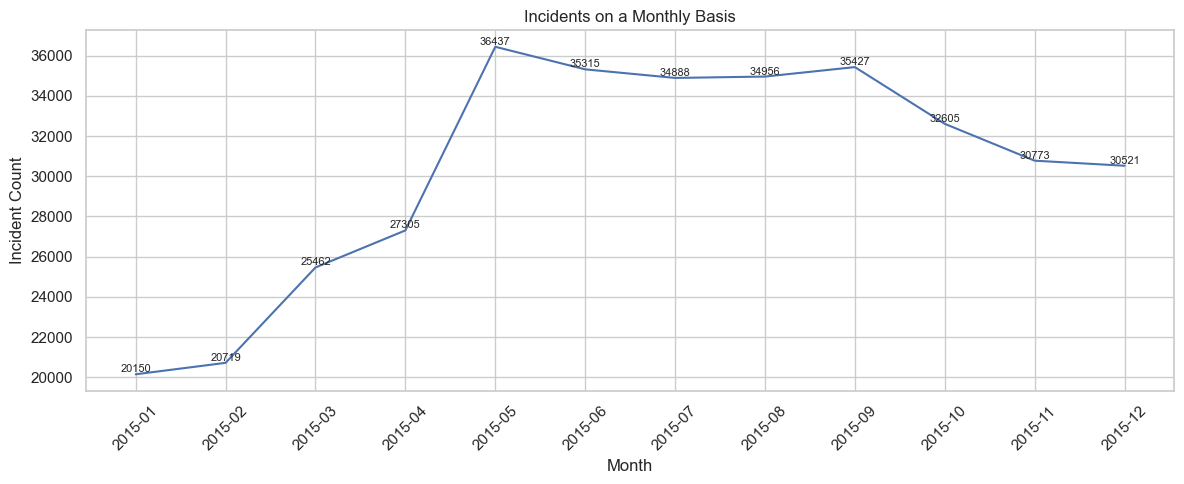

In [247]:
# Adding a 'YYYY-MM' column
df311['YYYY-MM'] = df311['Created Date'].apply(lambda x: datetime.datetime.strftime(x, '%Y-%m'))

# Grouping by 'YYYY-MM' and getting incident counts per month
monthly_incidents = df311.groupby('YYYY-MM').size()

# Set Seaborn style
sns.set(style="whitegrid")

# Creating the plot
plt.figure(figsize=(12, 5))
ax = sns.lineplot(data=monthly_incidents, markers=True, palette="viridis_r")
plt.title('Incidents on a Monthly Basis')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)

# Adding labels to data points
for x, y in zip(monthly_incidents.index, monthly_incidents.values):
    ax.text(x, y, str(y), ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()


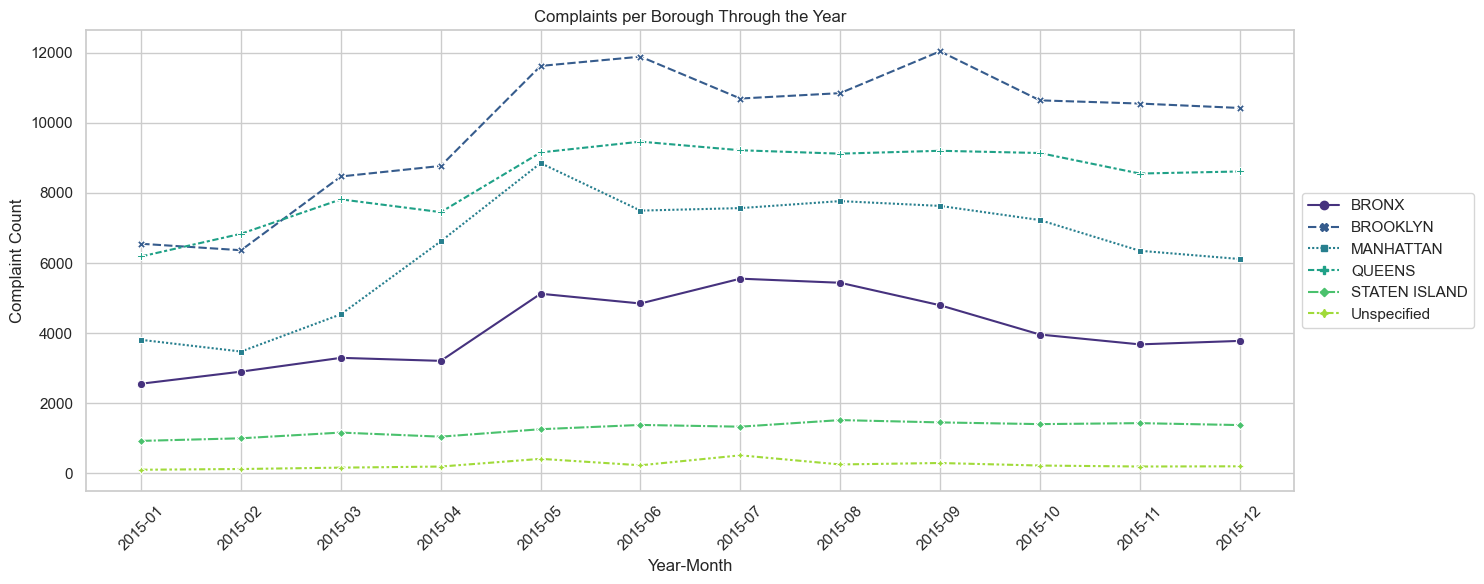

In [254]:
# Adding a 'YYYY-MM' column
df311['YYYY-MM'] = df311['Created Date'].apply(lambda x: datetime.datetime.strftime(x, '%Y-%m'))

# Grouping by 'YYYY-MM' and 'Borough', and getting complaint counts per month and borough
complaints_per_borough = df311.groupby(['YYYY-MM', 'Borough']).size().unstack()

# Set Seaborn style
sns.set(style="whitegrid", palette="viridis")

# Creating the plot using Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(data=complaints_per_borough, markers=True)
plt.title('Complaints per Borough Through the Year')
plt.xlabel('Year-Month')
plt.ylabel('Complaint Count')
plt.xticks(rotation=45)

# Improved legend placement using Seaborn
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()

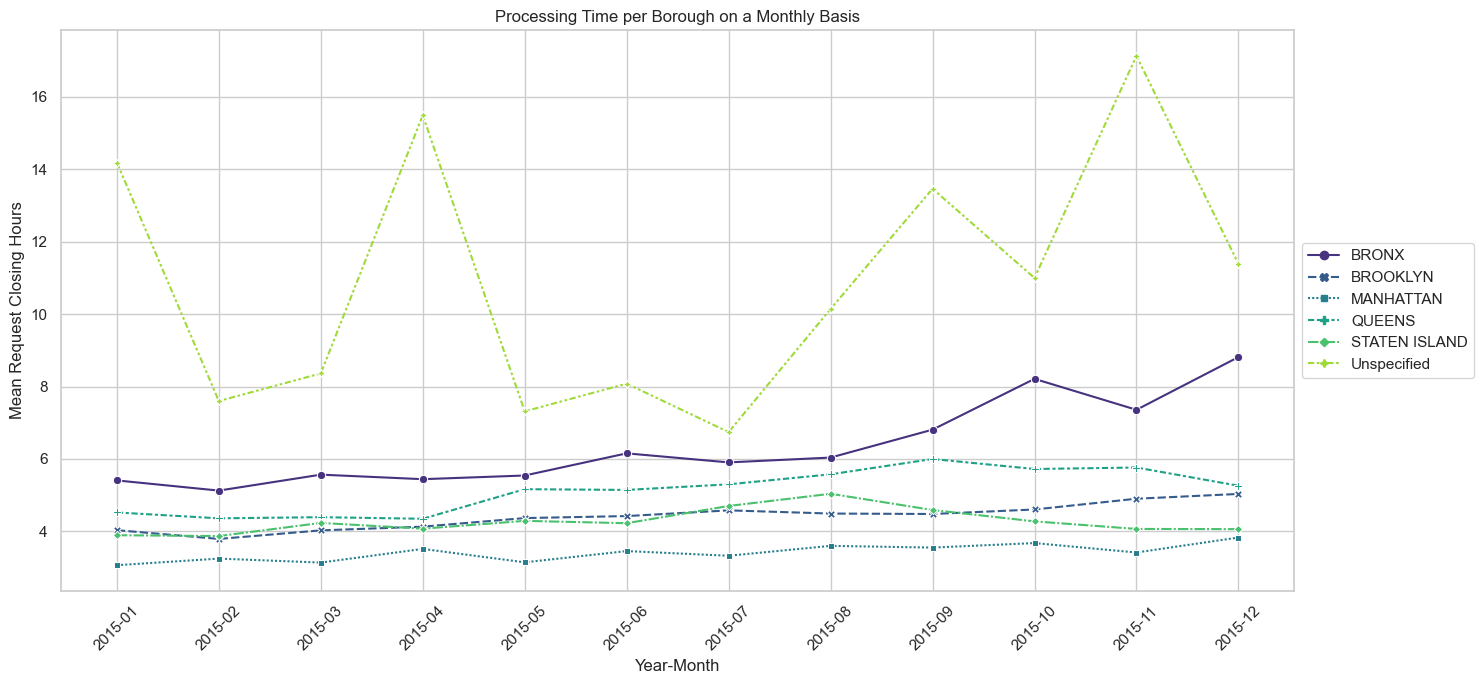

In [258]:
# Assuming you have already loaded and processed your data into 'df311'

# Adding a 'YYYY-MM' column
df311['YYYY-MM'] = df311['Created Date'].apply(lambda x: datetime.datetime.strftime(x, '%Y-%m'))

# Grouping by 'YYYY-MM' and 'Borough', and getting the mean processing time per month and borough
processing_time_per_borough = df311.groupby(['YYYY-MM', 'Borough'])['Request_Closing_Hours'].mean().unstack()

# Set Seaborn style
sns.set(style="whitegrid", palette="viridis")

# Creating the plot using Seaborn
plt.figure(figsize=(15, 7))
sns.lineplot(data=processing_time_per_borough, markers=True)
plt.title('Processing Time per Borough on a Monthly Basis')
plt.xlabel('Year-Month')
plt.ylabel('Mean Request Closing Hours')
plt.xticks(rotation=45)

# Improved legend placement using Seaborn
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()

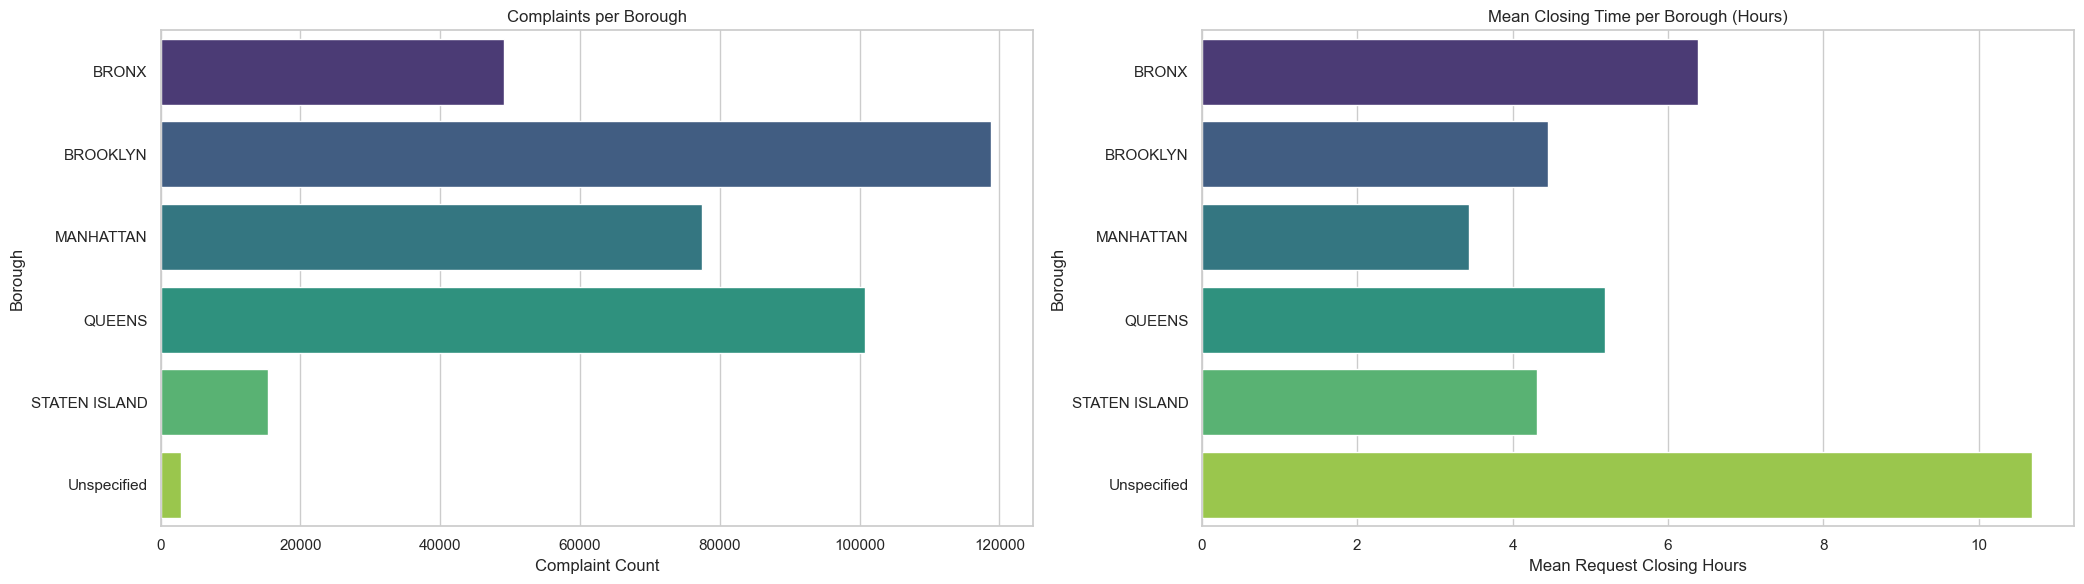

In [259]:
# Creating a figure with two subplots
fig = plt.figure(figsize=(21, 6))

# First subplot: Complaints per Borough
plt.subplot(1, 2, 1)
complaints_per_borough = df311.groupby('Borough')['Unique Key'].size()
sns.barplot(y=complaints_per_borough.index, x=complaints_per_borough.values)
plt.title('Complaints per Borough')
plt.xlabel('Complaint Count')
plt.ylabel('Borough')

# Second subplot: Mean Closing Time per Borough
plt.subplot(1, 2, 2)
mean_closing_time_per_borough = df311.groupby('Borough')['Request_Closing_Hours'].mean()
sns.barplot(y=mean_closing_time_per_borough.index, x=mean_closing_time_per_borough.values)
plt.title('Mean Closing Time per Borough (Hours)')
plt.xlabel('Mean Request Closing Hours')
plt.ylabel('Borough')

plt.tight_layout()
plt.show()

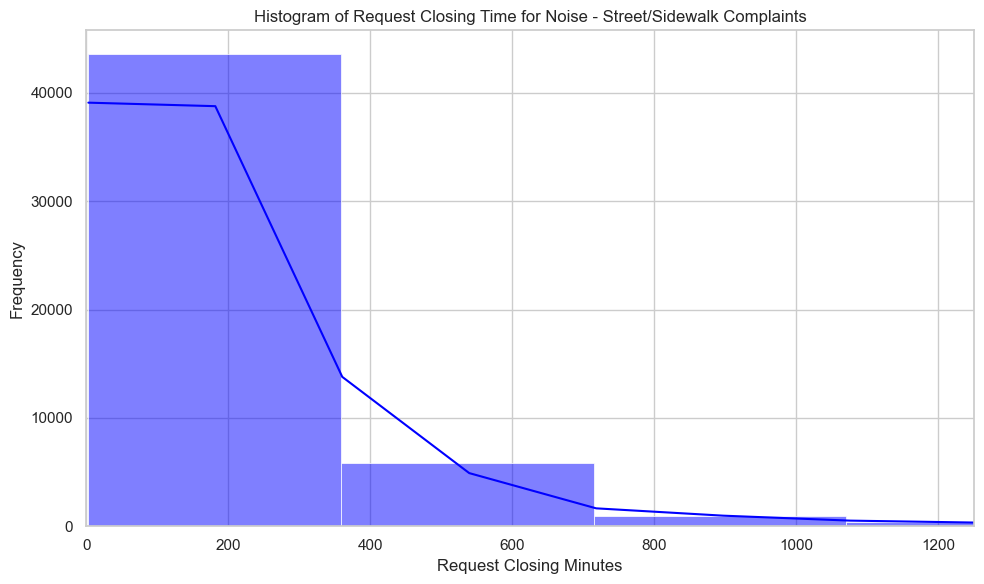

In [260]:
# Adding a 'Request_Closing_Minutes' column
df311['Request_Closing_Minutes'] = df311['Request_Closing_Time'].astype('timedelta64[m]') + 1

# Filtering data for 'Noise - Street/Sidewalk' complaint type
original = df311[df311['Complaint Type'] == 'Noise - Street/Sidewalk']['Request_Closing_Minutes']

# Creating the histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(original, bins=100, kde=True, color='blue')
plt.title('Histogram of Request Closing Time for Noise - Street/Sidewalk Complaints')
plt.xlabel('Request Closing Minutes')
plt.ylabel('Frequency')
plt.xlim(0, 1250)  # Limiting x-axis range

plt.tight_layout()
plt.show()

In [261]:
data = {}
for complaint in df311['Complaint Type'].unique():
    data[complaint] = np.log(df311[df311['Complaint Type']==complaint]['Request_Closing_Minutes'])

In [262]:
data.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling', 'Noise - Park', 'Homeless Encampment', 'Urinating in Public', 'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'])

<AxesSubplot:>

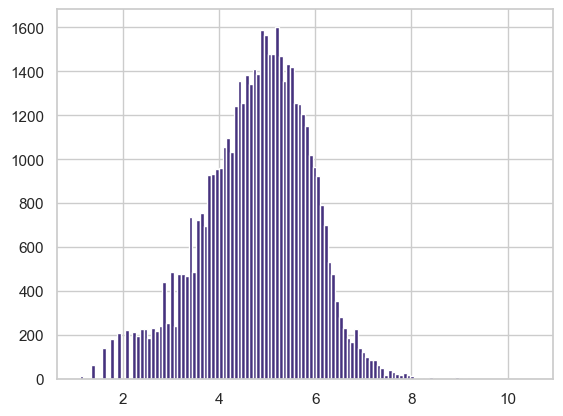

In [263]:
data['Noise - Street/Sidewalk'].hist(bins=120)

<AxesSubplot:>

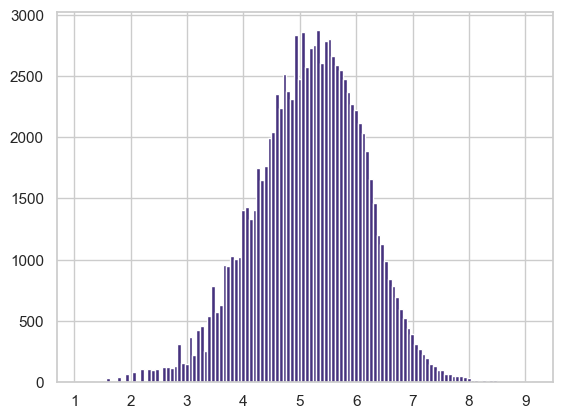

In [264]:
data['Blocked Driveway'].hist(bins=120)

<AxesSubplot:>

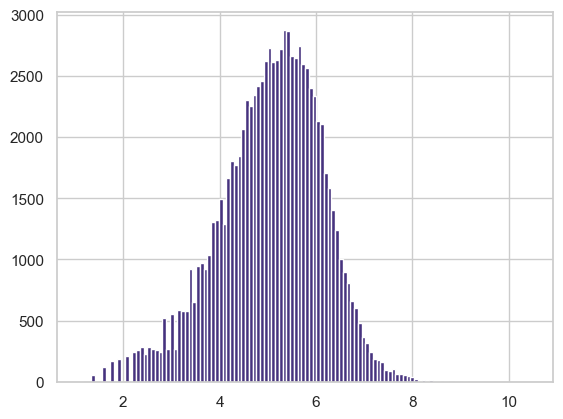

In [265]:
data['Illegal Parking'].hist(bins=120)

<AxesSubplot:>

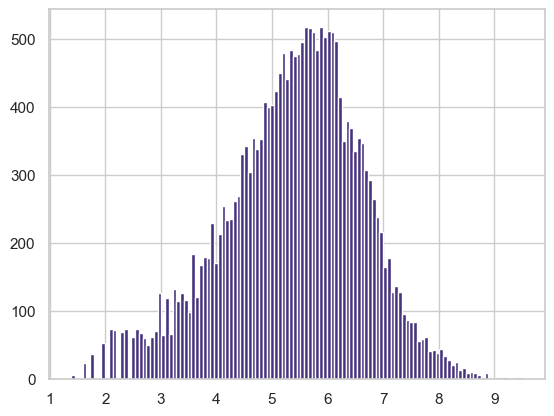

In [267]:
data['Derelict Vehicle'].hist(bins=120)

<AxesSubplot:>

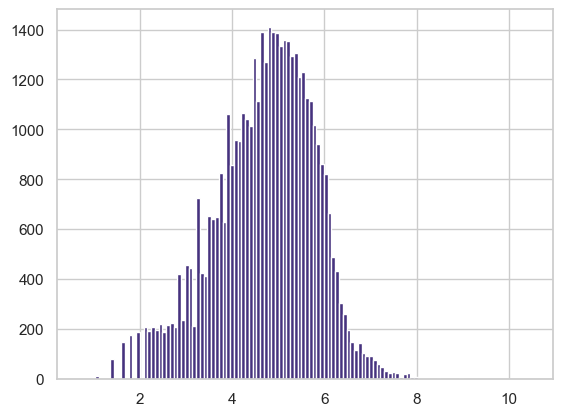

In [268]:
data['Noise - Commercial'].hist(bins=120)
 

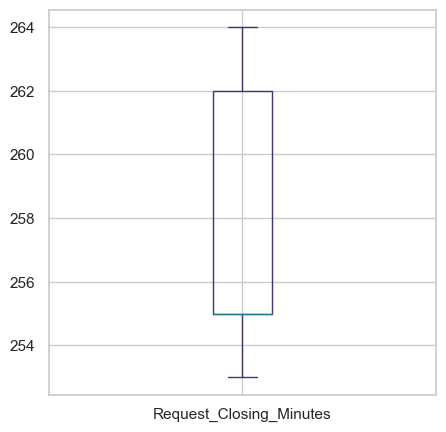

In [271]:
data['Noise - Street/Sidewalk'].value_counts().head().plot(kind='box',figsize=(5,5));

## DATA MODELLING

In [58]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer


In [59]:
# List of numerical features
features = ['Incident Zip', 'Latitude', 'Longitude']

# List of categorical features
categorical_features = ['Location Type', 'Descriptor']

# Target variable
target = 'Complaint Type'

# Creating the feature matrix (X) and target array (y)

# Extracting the numerical features from the DataFrame
X_numeric = df311[features]

# One-hot encoding the categorical features
X_categorical = pd.get_dummies(df311[categorical_features])

# Combining the numeric and one-hot encoded categorical features
X = pd.concat([X_numeric, X_categorical], axis=1)

# Extracting the target variable
y = df311[target]


In [60]:
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [122]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Perform cross-validation
scores = cross_val_score(clf, X_imputed, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


/Users/onyx/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores: [0.99391047 0.99407505 0.99295041 0.99425327 0.99352635]
Mean Accuracy: 0.9937431088973604


In [124]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [125]:
y_pred = clf.predict(X_test)


In [126]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=0)  # Set zero_division parameter

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9943904981347378
Classification Report:
                            precision    recall  f1-score   support

            Agency Issues       1.00      1.00      1.00         2
             Animal Abuse       1.00      1.00      1.00      2118
Bike/Roller/Skate Chronic       0.37      0.32      0.35       102
         Blocked Driveway       1.00      1.00      1.00     20125
         Derelict Vehicle       1.00      1.00      1.00      4382
         Disorderly Youth       0.98      0.98      0.98        63
                 Drinking       1.00      1.00      1.00       290
                 Graffiti       1.00      1.00      1.00        37
      Homeless Encampment       0.82      0.85      0.84      1010
        Illegal Fireworks       0.25      0.24      0.24        38
          Illegal Parking       1.00      1.00      1.00     18482
       Noise - Commercial       1.00      1.00      1.00      8804
 Noise - House of Worship       1.00      1.00      1.00       190
        

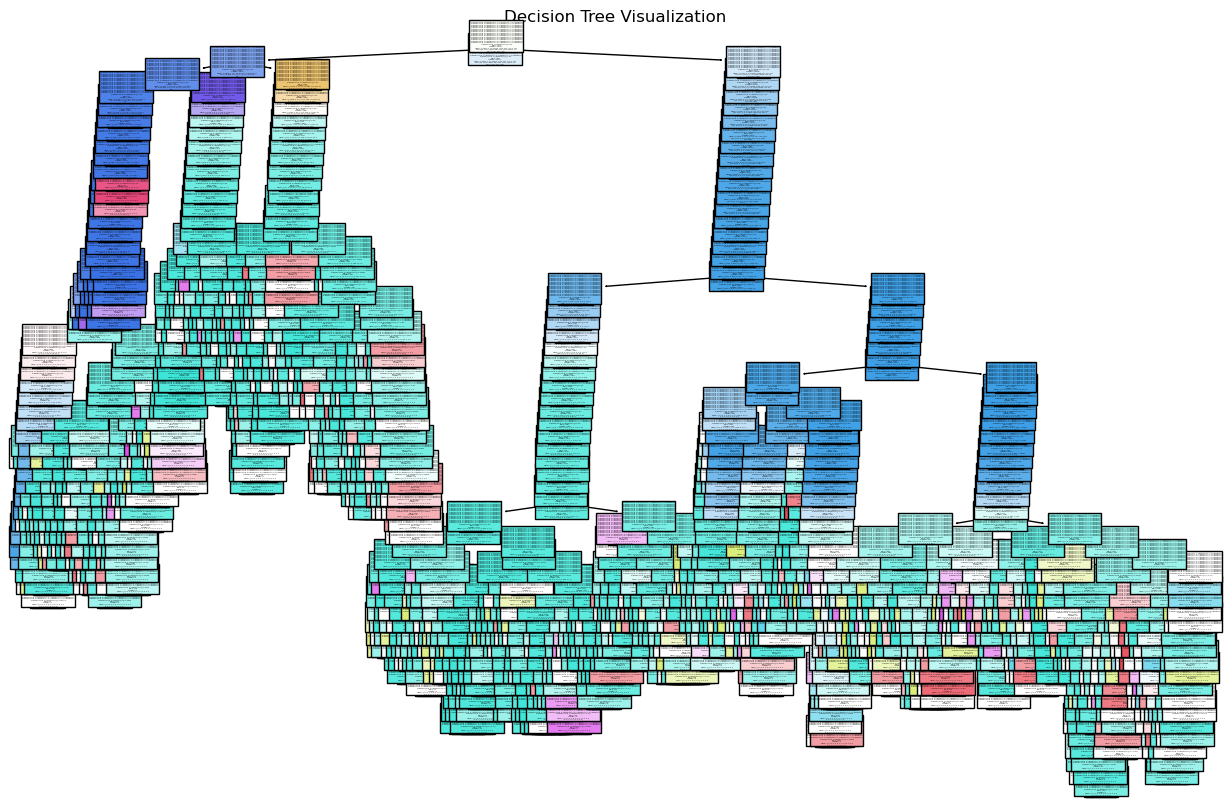

In [134]:
from sklearn.tree import plot_tree

# Decision Tree Visualization
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X_imputed)
plt.title('Decision Tree Visualization')
plt.show()



# Conclusion

In this script, we have performed various data processing and analysis tasks using the pandas and seaborn libraries in Python. We began by loading and preprocessing the data from a CSV file, handling missing values, and conducting exploratory data analysis. Throughout the script, we utilized pandas to manipulate and organize the data, while seaborn was employed to create informative visualizations that enhance our understanding of the data.

We explored different aspects of the dataset, including complaint types, request closing times, and geographic information. Seaborn's visualization capabilities were utilized to create bar plots, histograms, and line plots to provide insights into these aspects.

Furthermore, we demonstrated how to prepare data for classification tasks using the scikit-learn library. We split the data into training and testing sets, created a Decision Tree classifier, trained the model, made predictions, and evaluated its performance using accuracy and classification reports.

Throughout the script, comments have been provided to explain the purpose and functionality of each code section. These comments aim to improve code readability and ensure a clear understanding of the data processing and analysis steps undertaken.

By following these steps and leveraging the capabilities of pandas and seaborn, we've effectively processed, explored, visualized, and prepared our data for analysis and machine learning tasks.
